c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


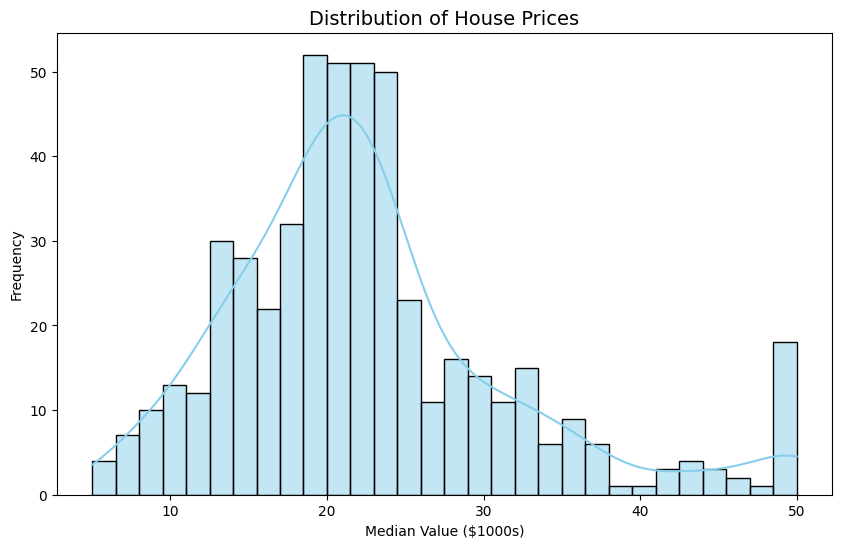

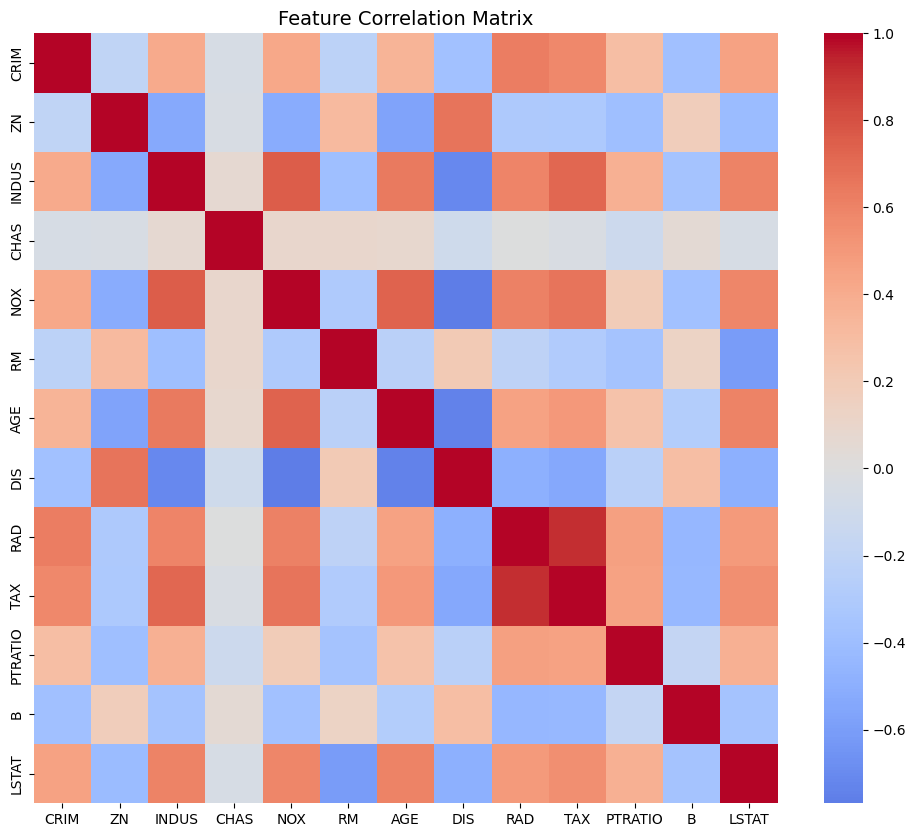

c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)
c:\Users\ROSE PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_glm\glm.py:284: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP

                 Model        R2      RMSE       MAE  CV_R2_mean  CV_R2_std
12    GradientBoosting  0.915334  2.491759  1.912243    0.847120   0.050801
11        RandomForest  0.892253  2.810963  2.039539    0.830439   0.055424
13          ExtraTrees  0.866931  3.123854  1.948392    0.865855   0.046797
10        DecisionTree  0.857963  3.227395  2.394118    0.621675   0.153921
18             SVR_C10  0.819266  3.640592  2.119156    0.790523   0.088802
14    PoissonRegressor  0.769146  4.114539  2.702452    0.771146   0.072017
16    TweedieRegressor  0.765256  4.149058  2.814431    0.737817   0.062563
15      GammaRegressor  0.735150  4.407095  2.990298    0.699139   0.071193
0     LinearRegression  0.668759  4.928602  3.189092    0.718478   0.078422
1            Ridge_0.1  0.668730  4.928823  3.188723    0.718507   0.078504
2              Ridge_1  0.668462  4.930812  3.185724    0.718728   0.079216
3             Ridge_10  0.665968  4.949328  3.172281    0.718832   0.084335
19        SG

C:\Users\ROSE PC\AppData\Local\Temp\ipykernel_13508\940842438.py:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2", y="Model", data=df_results, palette="viridis")


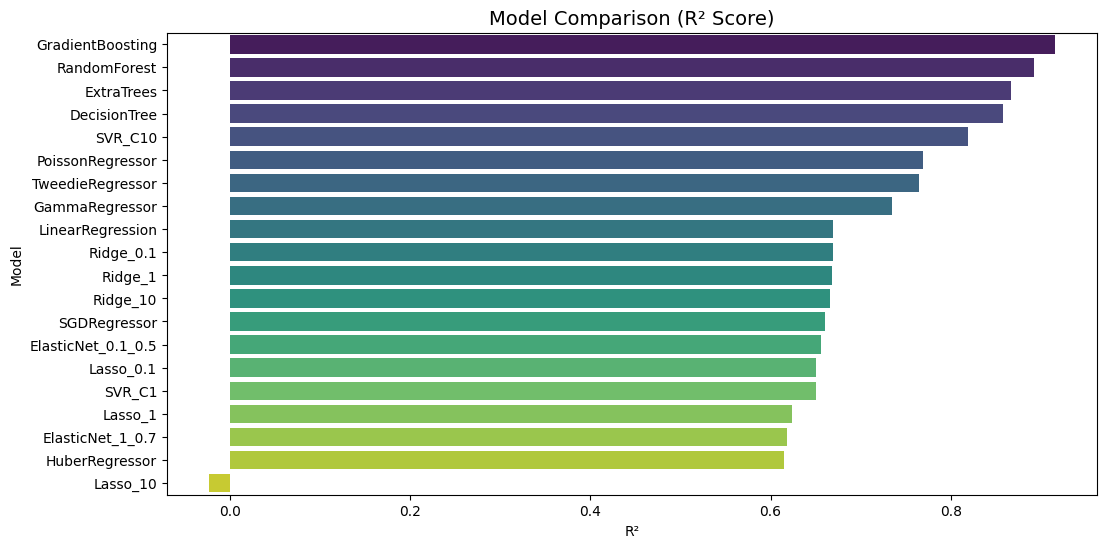

C:\Users\ROSE PC\AppData\Local\Temp\ipykernel_13508\940842438.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RMSE", y="Model", data=df_results, palette="mako")


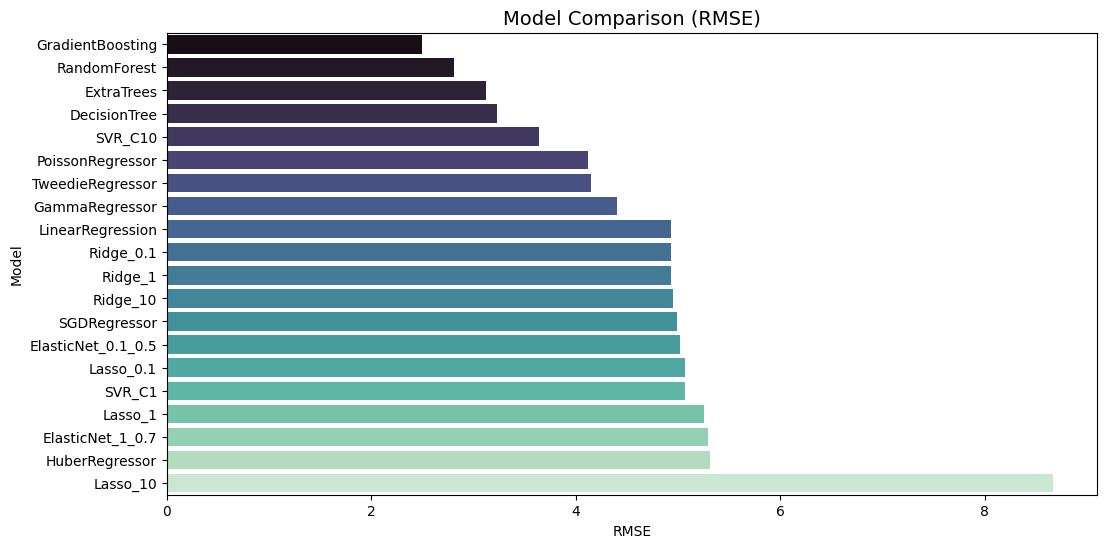

C:\Users\ROSE PC\AppData\Local\Temp\ipykernel_13508\940842438.py:129: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="MAE", y="Model", data=df_results, palette="rocket")


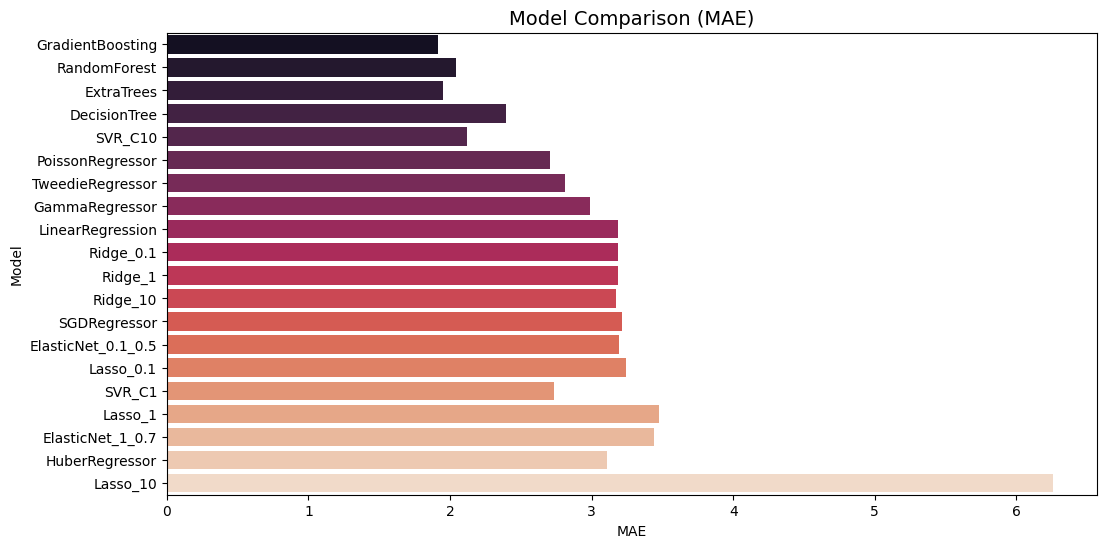

In [13]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    HuberRegressor, PoissonRegressor, GammaRegressor, TweedieRegressor, SGDRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR

# --------------------------
# Load dataset
# --------------------------
boston = fetch_openml(name="boston", version=1, as_frame=True)
X = boston.data
y = boston.target.astype(float)

# --------------------------
# Data Visualization
# --------------------------
plt.figure(figsize=(10,6))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title("Distribution of House Prices", fontsize=14)
plt.xlabel("Median Value ($1000s)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Matrix", fontsize=14)
plt.show()

# --------------------------
# Train / Test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling for sensitive models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --------------------------
# Define 20 Regression Models
# --------------------------
models = {
    "LinearRegression": LinearRegression(),
    "Ridge_0.1": Ridge(alpha=0.1),
    "Ridge_1": Ridge(alpha=1),
    "Ridge_10": Ridge(alpha=10),
    "Lasso_0.1": Lasso(alpha=0.1),
    "Lasso_1": Lasso(alpha=1),
    "Lasso_10": Lasso(alpha=10),
    "ElasticNet_0.1_0.5": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "ElasticNet_1_0.7": ElasticNet(alpha=1, l1_ratio=0.7),
    "HuberRegressor": HuberRegressor(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "PoissonRegressor": PoissonRegressor(),
    "GammaRegressor": GammaRegressor(),
    "TweedieRegressor": TweedieRegressor(power=1.5),
    "SVR_C1": SVR(kernel='rbf', C=1, gamma='scale'),
    "SVR_C10": SVR(kernel='rbf', C=10, gamma=0.1),
    "SGDRegressor": SGDRegressor(max_iter=1000, tol=1e-3, loss="squared_error", random_state=42)
}

# --------------------------
# Training & Evaluation
# --------------------------
results = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    if name.startswith(("SVR", "SGD", "Huber", "ElasticNet", "Lasso", "Ridge")):
        X_tr, X_te = X_train_scaled, X_test_scaled
    else:
        X_tr, X_te = X_train.values, X_test.values

    model.fit(X_tr, y_train)
    y_pred = model.predict(X_te)

    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    cv_scores = cross_val_score(model, X_tr, y_train, cv=kf, scoring='r2')

    results.append({
        "Model": name,
        "R2": r2,
        "RMSE": rmse,
        "MAE": mae,
        "CV_R2_mean": cv_scores.mean(),
        "CV_R2_std": cv_scores.std()
    })

df_results = pd.DataFrame(results).sort_values(by="R2", ascending=False)
print(df_results)

# --------------------------
# Visualization of Results
# --------------------------

plt.figure(figsize=(12,6))
sns.barplot(x="R2", y="Model", data=df_results, palette="viridis")
plt.title("Model Comparison (R² Score)", fontsize=14)
plt.xlabel("R²")
plt.ylabel("Model")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x="RMSE", y="Model", data=df_results, palette="mako")
plt.title("Model Comparison (RMSE)", fontsize=14)
plt.xlabel("RMSE")
plt.ylabel("Model")
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x="MAE", y="Model", data=df_results, palette="rocket")
plt.title("Model Comparison (MAE)", fontsize=14)
plt.xlabel("MAE")
plt.ylabel("Model")
plt.show()
